<a href="https://colab.research.google.com/github/Perla-Soleith/Probabilidad/blob/main/Unidad1/Practica_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Probabilidad y estadística***
#**Unidad 1**

#Práctica 5. **Estadística descriptiva del Dataset Autos**

### Facilitador: Jose Gabriel Rodiguez Rivas

### Alumno: Perla Soleith Moreno Pérez ☀

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from statistics import stdev

In [63]:
#Archivo
auts = pd.read_csv("AUTOS.csv", encoding = "ISO-8859-1")

# **1. Cargar el Dataset de Autos y realizar las Estadísticas descriptivas básicas y medidas de tendencia central**

In [64]:
#Valor minimo precios
auts.price.min()

5118.0

In [65]:
#Valor maximo precios
auts.price.max()

45400.0

In [66]:
#Moda precios
auts.price.mode()

,price
0,5572.0
1,6229.0
2,6692.0
3,7295.0
4,7609.0
5,7775.0
6,7898.0
7,7957.0
8,8495.0
9,8845.0


In [67]:
#media precios
print("El valor de la media es: ", auts.price.mean() )

El valor de la media es:  13207.129353233831


In [68]:
#mediana precios
print("El valor de la mediana es: ", auts.price.median() )

El valor de la mediana es:  10295.0


In [69]:
#desviación estandar de precios
desEstandar = auts["price"].std()
print ("El valor de la desviación estandar es: ", desEstandar)

El valor de la desviación estandar es:  7947.066341939271


In [70]:
#estadisticos y cuartiles
auts.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# **2. Realizar un Histograma de precios de los automóviles**

In [71]:
#DataFrame
df = pd.DataFrame (auts.price)
print(df.columns)

Index(['price'], dtype='object')


In [72]:
#Regla de sturges para los intervalos
df - pd.DataFrame({'Precio': auts.price})
df
n = len(auts["price"])

In [73]:
#Número de intervalos

import math

precios = df['price'].dropna()
n = len(precios)
k = int (1+ math.log2(n))
print ("Valor de n = ", n, " \nNúmero de intervalos = ", k)


Valor de n =  201  
Número de intervalos =  8


In [74]:
# Crear intervalos
intervalos = pd.cut(auts["price"], bins=k)

In [75]:
#tabla de frecuenias
tabla_frecuencias = pd.cut (df['price'], bins = k, include_lowest = True).value_counts().reset_index()
tabla_frecuencias.columns = ['Clase', 'Frecuencia']
tabla_frecuencias = tabla_frecuencias.sort_values (by = 'Clase')

#imprimir la tabla de distribución de frecuencias
print ("Tabla de Distribución de Frecuencias: ")
tabla_frecuencias


Tabla de Distribución de Frecuencias: 


,Clase,Frecuencia
0,"(5077.717, 10153.25]",98
1,"(10153.25, 15188.5]",42
2,"(15188.5, 20223.75]",36
3,"(20223.75, 25259.0]",8
6,"(25259.0, 30294.25]",3
4,"(30294.25, 35329.5]",7
5,"(35329.5, 40364.75]",4
7,"(40364.75, 45400.0]",3


In [76]:
# mas columnas
tabla_frecuencias["Frec Rel"] = tabla_frecuencias["Frecuencia"] / n
tabla_frecuencias["Frec Porc"] = tabla_frecuencias["Frec Rel"] * 100
tabla_frecuencias["Frec Ac"] = tabla_frecuencias["Frecuencia"].cumsum()
tabla_frecuencias["Frec Rel Ac"] = tabla_frecuencias["Frec Rel"].cumsum()
tabla_frecuencias["Frec Porc Ac"] = tabla_frecuencias["Frec Porc"].cumsum()

print("Tabla de Distribución de Frecuencias:")
tabla_frecuencias

Tabla de Distribución de Frecuencias:


,Clase,Frecuencia,Frec Rel,Frec Porc,Frec Ac,Frec Rel Ac,Frec Porc Ac
0,"(5077.717, 10153.25]",98,0.487562,48.756219,98,0.487562,48.756219
1,"(10153.25, 15188.5]",42,0.208955,20.895522,140,0.696517,69.651741
2,"(15188.5, 20223.75]",36,0.179104,17.910448,176,0.875622,87.562189
3,"(20223.75, 25259.0]",8,0.039801,3.980100,184,0.915423,91.542289
6,"(25259.0, 30294.25]",3,0.014925,1.492537,187,0.930348,93.034826
4,"(30294.25, 35329.5]",7,0.034826,3.482587,194,0.965174,96.517413
5,"(35329.5, 40364.75]",4,0.019900,1.990050,198,0.985075,98.507463
7,"(40364.75, 45400.0]",3,0.014925,1.492537,201,1.000000,100.000000


Text(0, 0.5, 'Frecuencia')

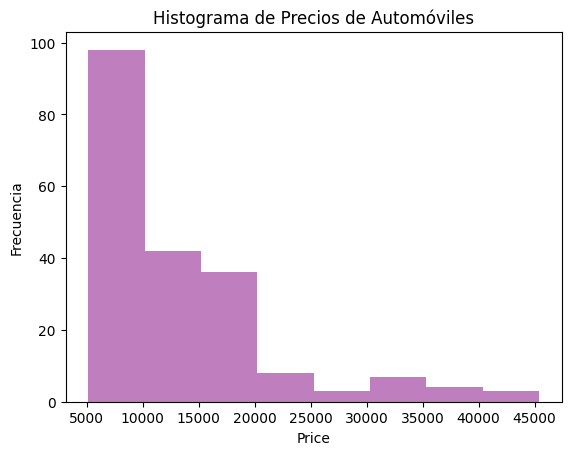

In [77]:
#mostrar histograma
plt.hist(precios, bins = k, alpha = 0.5, color = 'purple')
plt.title("Histograma de Precios de Automóviles")
plt.xlabel ('Price')
plt.ylabel ('Frecuencia')

**Conclusiones:**

El histograma muestra que la mayoría de los automóviles tienen precios entre 5,000 y 15,000 pesos, lo que dice que los vehículos salen mas en económicos o de gama media.

A medida que el precio aumenta, la cantidad de autos disminuye, por lo que hay pocos vehículos de alto costo. En general, el mercado analizado está compuesto principalmente por autos accesibles, mientras que los más caros representan una pequeña parte del total.

# **3. Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo de vehículo (body style)**

In [78]:
#para referirce a los dos y además eliminar valores nulos

datos = auts[['price', 'body-style']].dropna()

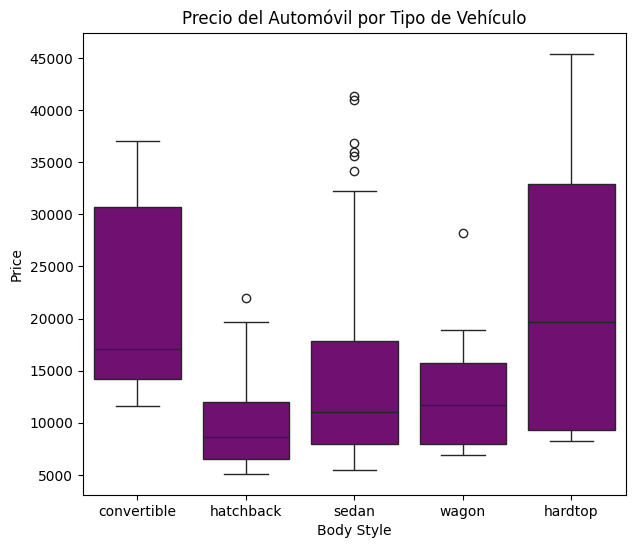

In [88]:
# diagrama de caja
plt.figure(figsize=(7,6))
sns.boxplot(x="body-style", y="price", data = datos, color ='purple')

#mostrar el diagrama

plt.title("Precio del Automóvil por Tipo de Vehículo")
plt.xlabel("Body Style")
plt.ylabel("Price")
#plt.xticks(rotation=45)

plt.show()

**Conclusiones:**

El diagrama muestra que el precio de los automóviles varía según el tipo de vehículo. Los hardtop y convertible presentan las medianas más altas, lo que indica que tienden a ser más costosos. Además varian mas en sus precios.

En cambio, los hatchback tienen los precios más bajos y una menor dispersión, lo que sugiere que son más económicos y más uniformes en precio. Los sedan y wagon se ubican en un punto intermedio.

# **4. Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo tracción ruedas (drive wheels)**

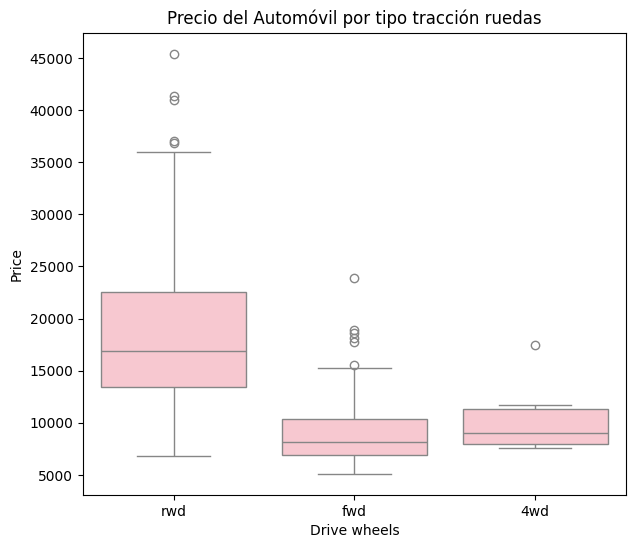

In [109]:
#datos
datos = auts[['price', 'drive-wheels']].dropna()

# diagrama de caja
plt.figure(figsize=(7,6))
sns.boxplot(x="drive-wheels", y = "price", data = datos, color ='pink')

#mostrar el diagrama

plt.title("Precio del Automóvil por tipo tracción ruedas")
plt.xlabel("Drive wheels")
plt.ylabel("Price")
#plt.xticks(rotation=45)

plt.show()

**Conclusiones:**

Se muestra que el precio del automóvil sí varía según el tipo de tracción.

Los vehículos rwd presentan la mediana más alta y mayor dispersión, lo que dice que suelen ser más costosos y con mayor variedad de precios.
Los automóviles fwd tienen los precios más bajos y más concentrados, lo que muestra que son más económicos.

Yy al final estan los vehículos 4wd que se ubican en un rango medio.

# **5. Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y la ubicación del motor (engine-location)**

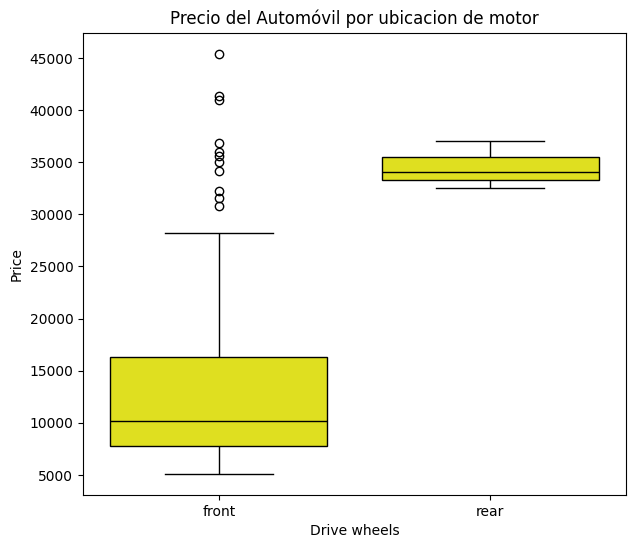

In [106]:
#datos
datos = auts[['price', 'engine-location']].dropna()

# diagrama de caja
plt.figure(figsize=(7,6))
sns.boxplot(x="engine-location", y = "price", data = datos, color ='yellow', linecolor='black')

#mostrar el diagrama

plt.title("Precio del Automóvil por ubicacion de motor")
plt.xlabel("Drive wheels")
plt.ylabel("Price")
#plt.xticks(rotation=45)

plt.show()

**Conclusiones:**

El diagrama muestra una diferencia muy marcada en el precio según la ubicación del motor.

Los automóviles rear tienen precios mucho más altos y concentrados en un rango elevado, lo que indica que suelen ser vehículos de gama alta.
En cambio, los vehículos front presentan precios más bajos y una mayor variabilidad.

# **6. Conclusines generales de la práctica**

Gracias a la práctica se observó que la mayoría de los automóviles se concentran en precios bajos y medios, mientras que los vehículos de alto costo representan una menor proporción.

Al relacionar el precio con distintas cosas como tipo de vehículo, tipo de tracción y ubicación del motor, se comprobó que el precio no es aleatorio, sino que depende de ciertas características del automóvil.

Los vehículos deportivos o de diseño más exclusivo, así como aquellos con tracción trasera o motor trasero, tienden a presentar precios más altos. En cambio, los modelos más comunes, con tracción delantera y motor delantero, suelen ser más baratos.

En general, el análisis demuestra que las características técnicas y el tipo de vehículo influyen directamente en el precio, viendo asi la identificación de que factores están asociados con automóviles de mayor valor en el mercado.